<a href="https://colab.research.google.com/github/kartikay89/Data-Analysis/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix

**The Netflix data has been taken from Kaggle.com**

In [2]:
# Netflix Titles data - Kaggle (URL: https://www.kaggle.com/shivamb/netflix-shows)

"""
What will we find out?

1. Trend of Genres(listed_in) in particular year?
2. Directors related to these genres?
3. Type of the title? Whether it is a movie or a TV show?

"""

'\nWhat will we find out?\n\n1. Trend of Genres(listed_in) in particular year?\n2. Directors related to these genres?\n3. Type of the title? Whether it is a movie or a TV show?\n\n'

**Import Libraries**

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from itertools import *
import json
import sqlite3 as db
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

**Original dataset**

In [4]:
netflixData = pd.read_csv("/content/drive/MyDrive/Google Colab Data /netflix_titles.csv").fillna('0')
netflixData

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,0,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,0,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,0,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,0,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,0,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,0,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,0,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,0,0,0,0,2016,0,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,0,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,0,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


**All Listed years** 

In [5]:
year_of_release = list(set(netflixData["release_year"]))
# type(year_of_release)
# year_of_release

**Genre Trend according to year**

In [6]:
# Trend of Genres in particular year.
# year to movie names dictionary.

year_to_movie_dict = {}

for years in year_of_release:
  titles = netflixData.loc[netflixData['release_year'] == years, 'title']

  if years not in year_to_movie_dict:
    year_to_movie_dict[years] = titles

In [7]:
year_to_movie_dict

year_to_movie_df = {}
for key, value in year_to_movie_dict.items():
  year_to_movie_df["Movie"] = year_to_movie_dict

**Movies and TV shows that released in a particular year**

In [8]:
netflixDFOne = pd.DataFrame(year_to_movie_df)
# netflixDFOne

In [9]:
number_of_rows = len(netflixDFOne.index)
# number_of_rows

In [10]:
netflixDFTwo = pd.DataFrame([netflixDFOne.index, netflixDFOne.Movie]).transpose()
netflixDFTwo.rename(columns={0:'Years', 1:'Movies'}, inplace=True)
# netflixDFTwo

**Movies from 2019**

In [11]:
print(list(netflixDFTwo.loc[ netflixDFTwo['Years'] == 2019, 'Movies'  ]))

[0       Norm of the North: King Sized Adventure
34                   Archibald's Next Big Thing
35                                   Article 15
38                          Kill Me If You Dare
39                                      The Spy
                         ...                   
6198                              The Protector
6204                                     Cuckoo
6206                                  Samantha!
6215                        Crazy Ex-Girlfriend
6219                         Pokémon the Series
Name: title, Length: 843, dtype: object]


**Table provides all movies along with their Genres**

In [12]:
# Adding the genres to the movies
movieTitles = list(netflixData['title'])

# dictionary contaning movie titles
title_dict = {}

for movies in movieTitles:
  mTitlesGenres = netflixData.loc[ netflixData['title']  == movies, 'listed_in']

  if movies not in title_dict:
    title_dict[movies] = mTitlesGenres

In [13]:
mTitlesGenres_df = {}

for key, value in title_dict.items():
  mTitlesGenres_df['Genres'] = title_dict



In [14]:
genresDF = pd.DataFrame(mTitlesGenres_df)
# genresDF

**DATAFRAME - DICTIONARY: Movies: Genres**

In [15]:
MovieTitles = pd.Series(netflixData.title)
MovieGenres = pd.Series(netflixData.listed_in)

DFOneNetflix = pd.DataFrame(MovieTitles)
DFOneNetflix['Genres'] = pd.DataFrame(MovieGenres)
DFTwoNetflix = DFOneNetflix
# print(DFTwoNetflix)

# converts DataFrame to Dict w/o index - all records
dFtoDict = DFTwoNetflix.set_index('title')['Genres'].to_dict()
# print(dFtoDict)
# print(type(dFtoDict))

**Cross checking the movies by year with their genres**

In [16]:
to_match_list = list(netflixDFTwo.loc[ netflixDFTwo['Years'] == 2018, 'Movies'  ])
matchList = to_match_list[:]
# matchList = [movieNames.str.lower() for movieNames in to_match_list[:]]
# print(matchList)
print(len(dFtoDict))

# movieList = []

# function to make raw strings to match movie names.
# def toRE(testList):
# 	for i in testList:
# 		movieList.append("r'\b" + i + "\b'")

# toRE(dFtoDict.keys())
# print(movieList)




6172


**Matching the movie names by year and finding their Genres.**

In [17]:
for index, movieNames in enumerate(matchList):
  movieGenDict = { keys:values for keys, values in dFtoDict.items()  if keys in str(movieNames)}
  # print(movieGenDict)
movieGenDict


{'21': 'Dramas',
 '9': 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
 'Anthony Bourdain: Parts Unknown': 'Docuseries',
 'Ash vs. Evil Dead': 'TV Action & Adventure, TV Comedies, TV Horror',
 'BAKI': 'Anime Series, International TV Shows',
 'City of Joy': 'Documentaries',
 'First and Last': 'Docuseries',
 'Joy': 'Dramas, Independent Movies, International Movies',
 'K': 'Anime Series, Crime TV Shows, International TV Shows',
 'Last': 'Crime TV Shows, International TV Shows, Korean TV Shows',
 'Next': 'Action & Adventure, Sci-Fi & Fantasy',
 'Next Gen': 'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
 'P': 'Horror Movies, International Movies',
 'Señora Acero': 'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
 'Sierra Burgess Is A Loser': 'Comedies, Romantic Movies',
 'The Magic School Bus': "Kids' TV",
 'The Magic School Bus Rides Again': "Kids' TV",
 'The Most Assassinated Woman in the World': 'Dramas, International Movies, Thrillers'}

**PIE CHART: Genres**

In [18]:
# Most popular genres.

list_of_genres = list(Counter(dFtoDict.values()))
print(type(list_of_genres))

# Counter for genres
genresCounter = {}
counter = 0

for genres in list_of_genres:
  if genres in dFtoDict.values():
    counter +=1
    # print(genres += 1)
    genresCounter[genres] = counter

# genresCounter
# print(max(genresCounter.values()))

listingGenres = list(genresCounter.values())
listingGenresSorted = sorted( listingGenres, reverse=True)
max_genres_Popular = listingGenresSorted[:5]

<class 'list'>


In [19]:
labels = []
sizes = []

for max_genres in max_genres_Popular:
  mGenre = str(max_genres)
  # print(mGenre)
  for genre, counter in genresCounter.items():
    if mGenre in str(counter):
      print(genre, mGenre)
      labels.append(genre)
      sizes.append(mGenre)


Reality TV, Spanish-Language TV Shows 458
TV Comedies, TV Dramas, TV Horror 457
Romantic TV Shows, TV Action & Adventure, TV Dramas 456
British TV Shows, TV Comedies, TV Dramas 455
Classic & Cult TV, Kids' TV, TV Comedies 454


<function matplotlib.pyplot.show>

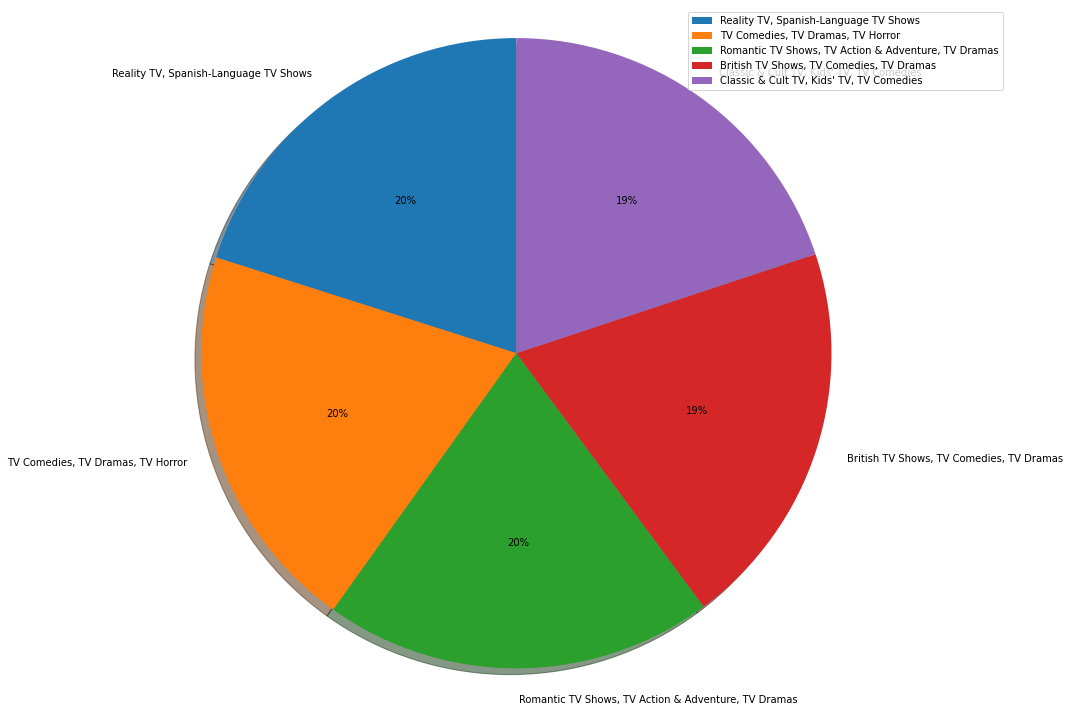

In [56]:
# The PIE CHART of popular genres:
# Carrying the list: labels and sizes from the above cell.
# explode = (0.1, 0, 0, 0)

plt.figure(figsize=(15,10))
plt.pie(sizes, labels=labels, autopct='%d%%', shadow=True, startangle=90)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()


plt.show

**Directors working in a Genre**

In [21]:
# Let us find out information about the movies, their directors, and their genre.

# dFtoDict: Movie to Genre

movieDirectorsDF = netflixData.filter(['title', 'director'], axis=1)

In [22]:
# converting the DataFrame to dictionary.

movieDirectorsDict = movieDirectorsDF.set_index('title')['director'].to_dict()
list(islice(movieDirectorsDict.items(), 10))

[('Norm of the North: King Sized Adventure', 'Richard Finn, Tim Maltby'),
 ('Jandino: Whatever it Takes', '0'),
 ('Transformers Prime', '0'),
 ('Transformers: Robots in Disguise', '0'),
 ('#realityhigh', 'Fernando Lebrija'),
 ('Apaches', '0'),
 ('Automata', 'Gabe Ibáñez'),
 ('Fabrizio Copano: Solo pienso en mi', 'Rodrigo Toro, Francisco Schultz'),
 ('Fire Chasers', '0'),
 ('Good People', 'Henrik Ruben Genz')]

**Director's Genres**

In [23]:
# Let us now find out a director's favourite genre.

# dictionary: Director: Genre
directorsGenre_dict = {}

for title, genre in dFtoDict.items():
  for titles, directors in movieDirectorsDict.items():
    if titles in title:
      # print('Movie:  {} and the Director is {}'.format(title, directors))
      # print('Director:  {} and the Genre is {}'.format(directors, genre))
      if directors not in directorsGenre_dict:
        directorsGenre_dict[directors]=genre

**Directors working in a Genre scatter plot**

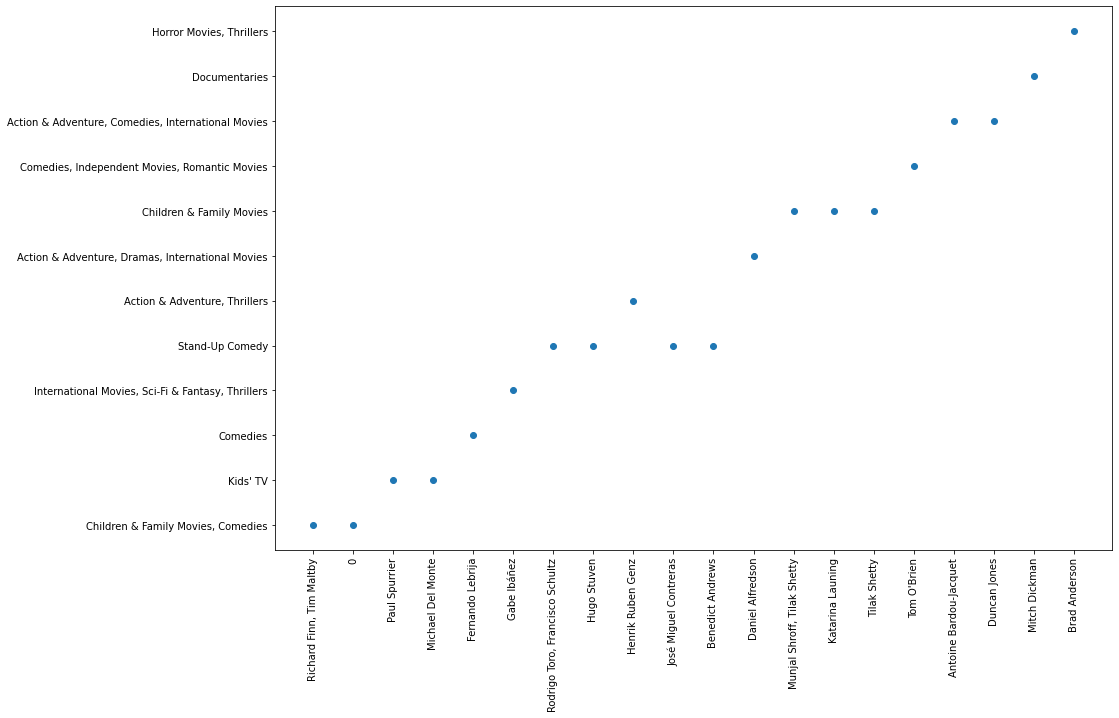

In [24]:
# Scatter plot to show directors and genres.
directors = []
genres = []


for director, genre in directorsGenre_dict.items():
  directors.append(str(director))
  genres.append(str(genre))


plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(directors[:20], genres[:20])
plt.xticks(rotation=90)
plt.show()

**Title to Country match**

In [25]:
movieCountryDF = netflixData.filter(['title', 'country'], axis=1)
movieCountryDF

,title,country
0,Norm of the North: King Sized Adventure,"United States, India, South Korea, China"
1,Jandino: Whatever it Takes,United Kingdom
2,Transformers Prime,United States
3,Transformers: Robots in Disguise,United States
4,#realityhigh,United States
...,...,...
6229,Red vs. Blue,United States
6230,Maron,United States
6231,Little Baby Bum: Nursery Rhyme Friends,0
6232,A Young Doctor's Notebook and Other Stories,United Kingdom


In [26]:
# converting the DataFrame to dictionary.

movieCountryDict = movieCountryDF.set_index('title')['country'].to_dict()
list(islice(movieCountryDict.items(), 10))

[('Norm of the North: King Sized Adventure',
  'United States, India, South Korea, China'),
 ('Jandino: Whatever it Takes', 'United Kingdom'),
 ('Transformers Prime', 'United States'),
 ('Transformers: Robots in Disguise', 'United States'),
 ('#realityhigh', 'United States'),
 ('Apaches', 'Spain'),
 ('Automata', 'Bulgaria, United States, Spain, Canada'),
 ('Fabrizio Copano: Solo pienso en mi', 'Chile'),
 ('Fire Chasers', 'United States'),
 ('Good People', 'United States, United Kingdom, Denmark, Sweden')]

In [27]:
# Let us now find out the country of the movie

# dictionary: Director: Genre
movieCountry_dict = {}

for title, genre in dFtoDict.items():
  for titles, country in movieCountryDict.items():
    if titles in title:
      # print('Movie:  {} and the Director is {}'.format(title, directors))
      # print('Director:  {} and the Genre is {}'.format(directors, genre))
      if title not in movieCountry_dict:
        movieCountry_dict[title]=country

**Scatter plot to display the country for respective movies**

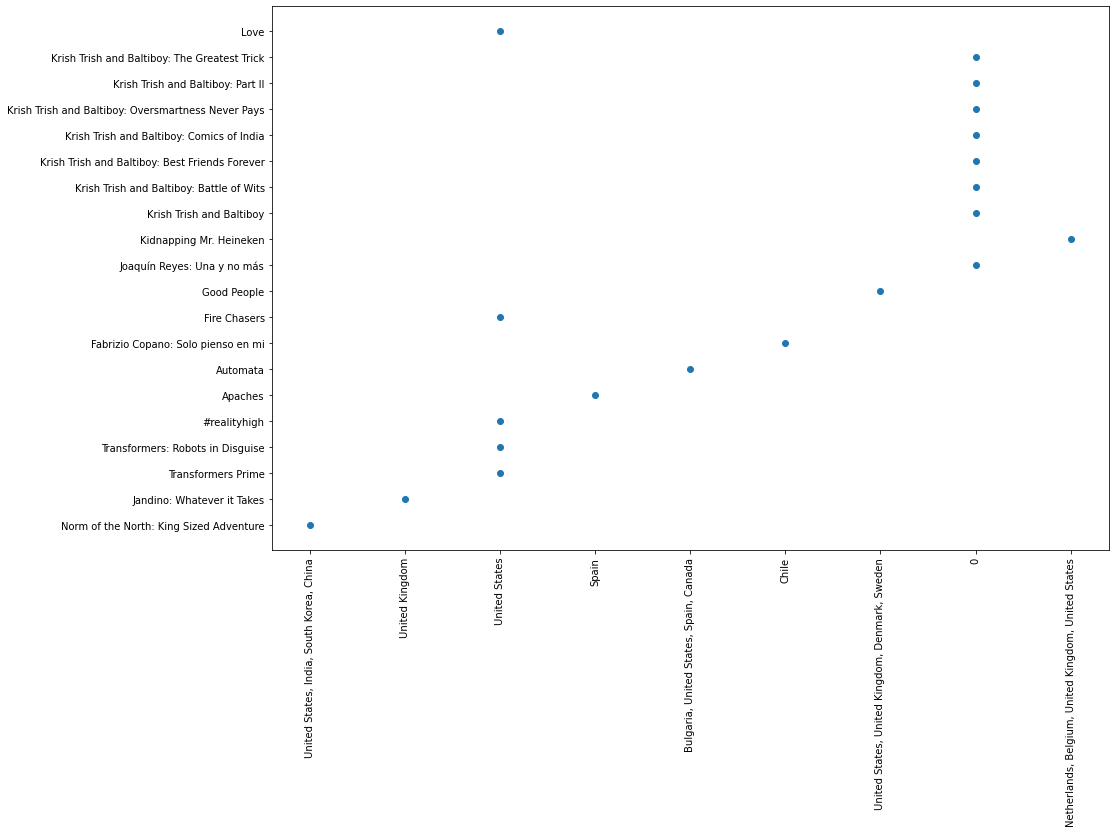

In [28]:
# Scatter plot to show directors and genres.
movieNames = []
countries = []


for movieName, country in movieCountry_dict.items():
  movieNames.append(str(movieName))
  countries.append(str(country))


plt.rcParams['figure.figsize'] = (15,10)
plt.scatter(countries[:20], movieNames[:20])
plt.xticks(rotation=90)
plt.show()


In [29]:
# Creating JSON file for the visualization.
"""

Title : Genre : Country

"""

'\n\nTitle : Genre : Country\n\n'

In [30]:
jsonData_v1 = pd.DataFrame.from_dict(dFtoDict, orient='index')

In [31]:
jsonV2 = jsonData_v1.reset_index()

In [32]:
jsonV3 = jsonV2.rename(columns={'index': 'Movies', 0: 'Genre'})
jsonV4 = jsonV3.reset_index(drop=True)
jsonV5 = jsonV4.sort_values('Movies', ascending=True).reset_index(drop=True)

In [33]:
result = jsonV3.to_json(orient="records")
parsed = json.loads(result)
with open("titleGenreCountry.json", 'w') as f:
          json.dump(parsed, f, indent=4)


In [34]:
movieCountryV1 = movieCountryDF.rename(columns={'title': 'Movies'})

In [35]:
MovieGenreCountry_json = jsonV5.merge(movieCountryV1, on = "Movies", how = "left")

In [36]:
# keyFrames = list(MovieGenreCountry_json.Movies)


# names = []

# for i in keyFrames:
#   names.append(i[0:1])

# MovieGenreCountry_json["key"]=names

# column_names = ["key", "Movies", "country", "Genre"]

# new_MCG = MovieGenreCountry_json.reindex(columns=column_names)

# MovieGenreCountry_json.iloc[2500: 3000] 

In [37]:
result = MovieGenreCountry_json.to_json(orient="records")
parsed = json.loads(result)
with open("titleGenreCountry.json", 'w') as f:
          json.dump(parsed, f, indent=4)

In [38]:
# json_random = netflixData.filter(['title', 'cast', 'description', 'release_year', 'type'], axis=1)

In [39]:
# Merging data for viz.

json_random = netflixData.filter(['title', 'cast'], axis=1)
# json_randomV1 = json_random.set_index('title')['cast'].to_dict()
json_randomV1 = json_random.rename(columns={'title': 'Movies', 'cast': 'Cast'})
MovieGenreCountryCast_json = MovieGenreCountry_json.merge(json_randomV1, on = "Movies", how = "left")

In [40]:
json_randomV2 = netflixData.filter(['title', 'description'], axis=1)
# json_randomV1 = json_random.set_index('title')['cast'].to_dict()
json_randomV3 = json_randomV2.rename(columns={'title': 'Movies', 'description': 'Description'})
MovieGenreCountryCastDes_json = MovieGenreCountryCast_json.merge(json_randomV3, on = "Movies", how = "left")

In [41]:
json_randomV4 = netflixData.filter(['title', 'release_year'], axis=1)
# json_randomV1 = json_random.set_index('title')['cast'].to_dict()
json_randomV5 = json_randomV4.rename(columns={'title': 'Movies', 'release_year': 'Release_year'})
MovieGenreCountryCastDesRS_json = MovieGenreCountryCastDes_json.merge(json_randomV5, on = "Movies", how = "left")

In [42]:
json_randomV6 = netflixData.filter(['title', 'type'], axis=1)
# json_randomV1 = json_random.set_index('title')['cast'].to_dict()
json_randomV7 = json_randomV6.rename(columns={'title': 'Movies', 'type': 'Type'})
MovieGenreCountryCastDesRStype_json = MovieGenreCountryCastDesRS_json.merge(json_randomV7, on = "Movies", how = "left")

In [43]:
randomDF = MovieGenreCountryCastDesRStype_json.sample(n = 500, replace = False) 

In [44]:
random_result = randomDF.to_json(orient="records")
parsed = json.loads(random_result)
with open("randomData.json", 'w') as f:
          json.dump(parsed, f, indent=4)

**Querying with geopy library to bring in the coordinates of countries mentioned in original dataset.**

In [45]:
!pip install geopy

In [46]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myapplication")
location = geolocator.geocode("India")
print(location.address)
print(location.longitude)
print(location.latitude)

India
78.6677428
22.3511148


In [47]:
# updating dataframe for the map
setData = netflixData['country']
listData = list(setData)
listData

newdata = []
df_update = {}

for countries in listData:
  splitData = countries.split(",")
  newdata.append(splitData[0])

  df_update['country']=newdata
UpdatedCountries = pd.DataFrame.from_dict(df_update)


updateNetflix = MovieGenreCountryCastDesRS_json.drop(['country'], axis=1)

updateNetflix['country']=UpdatedCountries.country


# finding the lat and long for the countries.
countries = []
countLat = {}
countLong = {}
unique = []

countriesLatLong = updateNetflix['country']
countriesLatLonglist = list(countriesLatLong)
for countryNames in countriesLatLonglist:
  # print(countryNames.split(",")[0])
  countries.append(countryNames)

uniqueCountries = set(countries)
unique.append(list(uniqueCountries))

for country in unique:
  print(country)
  for i in country:
    location = geolocator.geocode(i)
    try:
      # print('{}{}{}'.format(location.address, location.latitude, location.longitude))
      countLat[location.address]=location.latitude
      countLong[location.address]=location.longitude
    except Exception as e:
      pass

['Brazil', 'Ghana', 'Portugal', nan, 'Guatemala', 'Germany', 'Finland', 'Belgium', 'Ukraine', 'France', 'Georgia', 'United Kingdom', 'Japan', 'Canada', 'Soviet Union', 'Philippines', 'Colombia', 'Saudi Arabia', 'Lebanon', 'Dominican Republic', 'Pakistan', 'China', 'Iceland', 'Uruguay', 'Iran', 'South Africa', 'Spain', 'South Korea', 'Hungary', 'Hong Kong', 'Austria', 'Singapore', 'Venezuela', 'Taiwan', 'Argentina', 'Peru', 'Israel', 'Netherlands', 'Mexico', 'Chile', 'Australia', 'Vietnam', 'Egypt', 'Ireland', 'India', 'Cambodia', 'Russia', 'Somalia', 'United Arab Emirates', 'New Zealand', 'Bulgaria', 'United States', 'Thailand', 'West Germany', 'Mauritius', 'Serbia', 'Bangladesh', 'Turkey', 'Czech Republic', 'Cyprus', 'Sweden', 'Romania', 'Italy', 'Croatia', 'Nigeria', 'Poland', 'Slovenia', 'Indonesia', 'Denmark', 'Norway', 'Malaysia', '0', 'Switzerland', 'Paraguay']


**Merging the latitude and longitude columns found through geopy library to our dataframe**

In [48]:
# merging generated latitude and longitude to our existing dataframe.
latDF = pd.DataFrame.from_dict(countLat, orient='index')

latDFV2 = latDF.reset_index()
latDFV3 = latDFV2.rename(columns={0:'Latitude', 'index':'country'})

In [49]:
DFLat = updateNetflix.merge(latDFV3, on = "country", how = "left")

In [50]:
longDF = pd.DataFrame.from_dict(countLong, orient='index')

longDFV2 = longDF.reset_index()
longDFV3 = longDFV2.rename(columns={0:'Longitude', 'index':'country'})

In [51]:
finalDF  = DFLat.merge(longDFV3, on = "country", how = "left")
finalDF.head(20)

,Movies,Genre,Cast,Description,Release_year,country,Latitude,Longitude
0,#Roxy,"Comedies, Romantic Movies","Jake Short, Sarah Fisher, Booboo Stewart, Dann...",A teenage hacker with a huge nose helps a cool...,2018,United States,39.783730,-100.445882
1,#Rucker50,"Documentaries, Sports Movies",0,This documentary celebrates the 50th anniversa...,2016,United Kingdom,54.702354,-3.276575
2,#Selfie,"Comedies, Dramas, International Movies","Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...","Two days before their final exams, three teen ...",2014,United States,39.783730,-100.445882
3,#Selfie 69,"Comedies, Dramas, International Movies","Maia Morgenstern, Olimpia Melinte, Crina Semci...","After a painful breakup, a trio of party-lovin...",2016,United States,39.783730,-100.445882
4,#realityhigh,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",When nerdy high schooler Dani finally attracts...,2017,United States,39.783730,-100.445882
5,'89,Sports Movies,"Lee Dixon, Ian Wright, Paul Merson","Mixing old footage with interviews, this is th...",2017,Spain,NaN,NaN
6,(T)ERROR,Documentaries,0,This real-life look at FBI counterterrorism op...,2015,Bulgaria,NaN,NaN
7,1 Chance 2 Dance,"Dramas, Romantic Movies","Lexi Giovagnoli, Justin Ray, Rae Latt, Poonam ...",When an aspiring dancer is uprooted during her...,2014,Chile,-31.761336,-71.318770
8,1 Mile to You,"Dramas, Romantic Movies, Sports Movies","Billy Crudup, Graham Rogers, Liana Liberato, S...",After escaping the bus accident that killed hi...,2017,United States,39.783730,-100.445882
9,10 Days in Sun City,"Comedies, International Movies, Romantic Movies","Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",After his girlfriend wins the Miss Nigeria pag...,2017,United States,39.783730,-100.445882


**Using the newly created dataframe to display netflix services on map.**

In [52]:
import folium

In [53]:
DFMAP = finalDF.dropna(axis=0)

In [54]:
m = folium.Map(location=[0, -0],zoom_start=3)

locations = DFMAP[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
# print(locationlist[0:])
# print(len(locationlist))

uniqueVal = [list(i) for i in set(map(tuple, locationlist))]

mapList = locationlist[:2000]
# print(len(locationlist))
locationlist[7]


for points in range(0, len(uniqueVal)):
  folium.Marker(uniqueVal[points],
          icon=folium.Icon (color='darkblue', icon_color='white', icon='male', angle=0, prefix='fa')
).add_to(m)





m